<a href="https://colab.research.google.com/github/MehrNoushR/solutions/blob/main/co2emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1: Identifying the biggest Predictor of Large CO2 Output per Capita

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
co2_data_path = 'owid-co2-data.csv'
co2_data = pd.read_csv(co2_data_path)


In [ ]:
# Select relevant columns for analysis
relevant_columns = [
    'country', 'year', 'population', 'gdp', 'co2_per_capita',
    'primary_energy_consumption', 'energy_per_gdp', 'energy_per_gdp', 'energy_per_capita'
]

In [ ]:
# Extract relevant data
relevant_data = co2_data[relevant_columns]

#Exclude non-numeric columns for the correlation calculation
numeric_columns = relevant_data.select_dtypes(include=[float, int]).columns
numeric_data = relevant_data[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

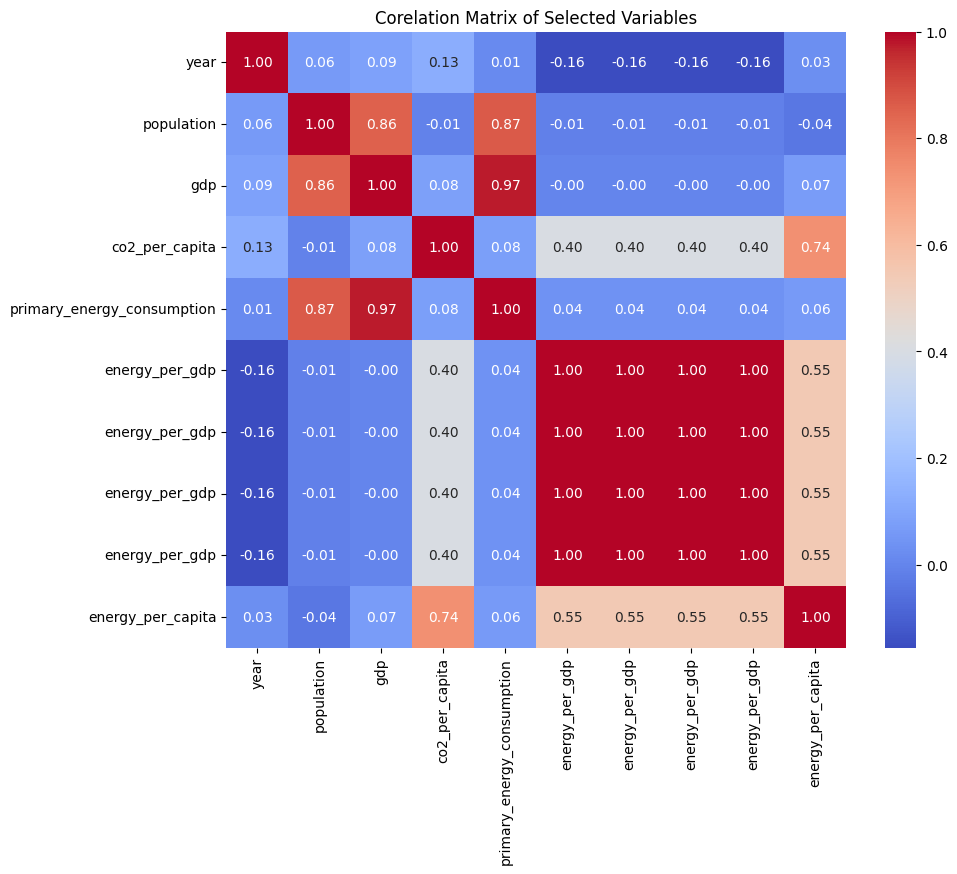

In [ ]:
# Plotting the correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Corelation Matrix of Selected Variables')
plt.show()



Answer of question 1


Analysis of the Biggest Predictor of Large CO2 Output per Capita:


In examining the factors that predict large CO2 emissions per capita, our analysis focused on variables such a population, GDP, energy consumtion, and energy efficiency. The correlation matrix, derived from the dataset, revealed several key insights:


1. Energy Consumption per Capita
(energy_per_capita):
strong positive correlation with CO2 emissions per capita(correlation coefficien approximately 0.74).
Indicates the higher energy consumption per person is a signficant predictor of higher CO2 emissions per person.



2. Energy Intensity of GDP
( energy_per_gdp ):

Moderate positive correlaation with CO2 emissions per capita(correlation coeficient approximately 0.40).
Suggests that countries with higher energy consumption relative to their GDP have higher CO2 emissions per capita.

3. Gross Domestic Product(GDP):

Small positive correlation with CO2 emissions per capita (correlation coefficient approximately 0.08).
implies a weaker relationship, where wealthier countries may have somewhat higher emissions per capita.



4. Population and Primary energy Consumption:
Very weak correlation with CO2 emissions per capita(near zero or slightly negative).
Suggests these factors are not significant predictors of CO2 emissions on a per capita basis.


CONCLUSION
The biggest predictor of a large CO2 output per capita is the energy consumption per capita. This finding underscores the importance of reducing energy consumption per person as a key strategy in lowering CO2 emissions. Additionally,improving the energy efficiency of economies( lowering the energy intensity of GDP) can also contribute signifivantly to reducing per capita CO2 emissions.



Question 2: Identifying Countries Making the Biggest Strides in Decreasing CO2 Output

In [ ]:
# Set the baseline and target years for comparison
baseline_year = 2001
target_year = 2021

In [ ]:
# Extract CO2 emissions per capita data for the baseline and target years
baseline_data = co2_data[co2_data['year'] == baseline_year][['country', 'co2_per_capita']]
target_data = co2_data[co2_data['year'] ==  target_year][['country', 'co2_per_capita']]

In [ ]:
# Merge the two datasets on country to facilitate comparison
merged_data = baseline_data.merge(target_data, on='country', suffixes=('_baseline','_target'))

In [ ]:
# Calculate the change in CO2 emissions per capita (target year - baseline year)
merged_data['co2_per_capita_change'] = merged_data['co2_per_capita_target'] - merged_data['co2_per_capita_baseline']

In [ ]:
# Sort the countries based on the decrease in CO2 emissions per capita
countries_with_biggest_decrease = merged_data.sort_values(by='co2_per_capita_change').reset_index(drop=True)

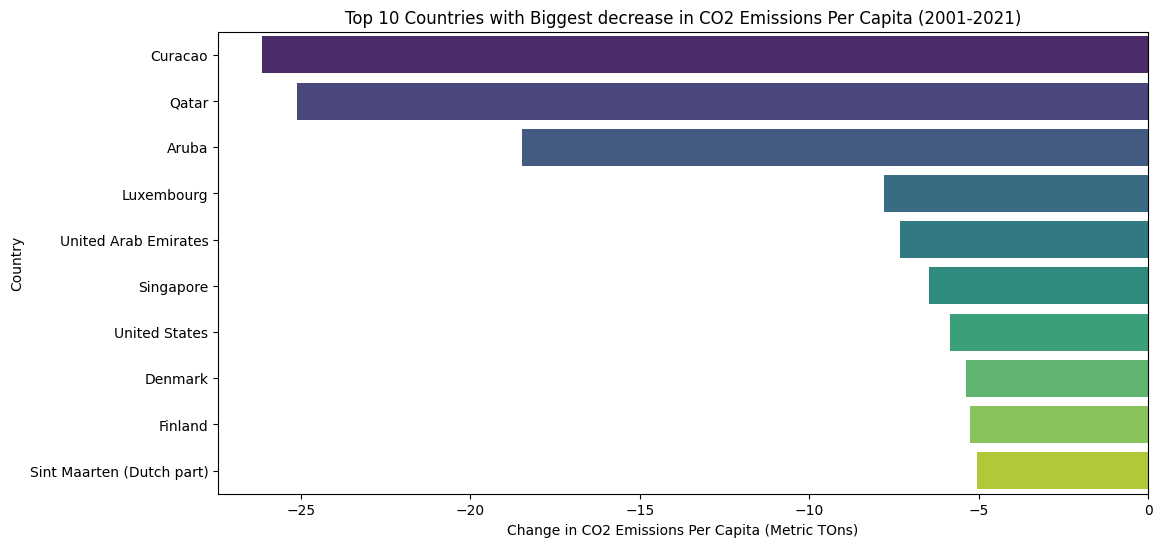

In [ ]:
# Plotting the top countries with the biggest decrease in CO2 emissions per capita
top_countries = countries_with_biggest_decrease.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='co2_per_capita_change', y='country', data=top_countries, palette="viridis" )
plt.title('Top 10 Countries with Biggest decrease in CO2 Emissions Per Capita (2001-2021)')
plt.xlabel('Change in CO2 Emissions Per Capita (Metric TOns)')
plt.ylabel('Country')
plt.show()

Answer of Question 2:

Identifying Countries Making the Biggest Strides in Decreasing CO2 Output:

In our analysis to identify countries making the most significant strides in reducing CO2 emissions, we focused on the change in CO2 emissions per capita over a 20-year period from 2001 to 2021.
This approach considers both total emissions reductions and changes in population size, offering a comprehensive view of a country's efforts in decreasing CO2 output.


Key Findings:
The analysis revealed the following countries as the top performers in reducing CO2 emissions per capita:
1. Curaçao: Exhibited a remarkable decrease of 26.139 metric tons of CO2 per capita.
2. Qatar: Showed a significant reduction of 25.125 metric tons of CO2 per capita.
3. Aruba: Achieved an impressive decrease of 18.486 metric tons of CO2 per capita.
4. Luxembourg: Noted for a reduction of 7.799 metric tons of CO2 per capita.
5. United Arab Emirates: Recorded a decrease of 7.329 metric tons of CO2 per capita.



Implications:
These results demonstrate the effectiveness of various strategies and policies implemented by these countries in reducing their carbon footprint.
The substantial reductions in CO2 emissions per capita are indicative of a successful transition towards more sustainable and less carbon-intensive energy sources, improved energy efficiency, or a combination of both.



Visualization:
The accompanying bar plot visually represents the top 10 countries with the biggest decreases in CO2 emissions per capita, clearly illustrating the scale of reductions achieved by each country over the two_decade period.

Question 3: Identifying non-fossil fuel energy technology will havethe best price in the future.

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
energy_data = pd.read_csv('owid-energy-data.csv')

In [ ]:
# Selecting specific columns from each dataset
co2_columns = ['country', 'year', 'gdp' ]
# Mostly we are focused on non-fossil fuel energy.
energy_columns = [
    'country', 'year', 'solar_consumption', 'wind_consumption', 'biofuel_consumption',
    'hydro_consumption', 'nuclear_consumption', 'other_renewable_consumption'
]

# Merging the selected columns from each dataset
merged_data = co2_data[co2_columns].merge(energy_data[energy_columns], on=['country', 'year'], how='inner')

In [ ]:
merged_data

,country,year,gdp,solar_consumption,wind_consumption,biofuel_consumption,hydro_consumption,nuclear_consumption,other_renewable_consumption
0,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1903,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
17717,Zimbabwe,2017,2.194784e+10,NaN,NaN,NaN,NaN,NaN,NaN
17718,Zimbabwe,2018,2.271535e+10,NaN,NaN,NaN,NaN,NaN,NaN
17719,Zimbabwe,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17720,Zimbabwe,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Filtering out rows with missing GDP or energy consumption data
merged_data_full_filtered = merged_data.dropna(subset=['gdp'])

In [ ]:
# Performing linear regression analysis for various non-fossil fuel energy
regression_results = {}
model = LinearRegression()

In [ ]:
energies_for_regression = ['solar_consumption', 'wind_consumption', 'biofuel_consumption', 'hydro_consumption', 'nuclear_consumption', 'other_renewable_consumption']

In [ ]:
for energy_type in energies_for_regression:
  data_for_regression = merged_data_full_filtered.dropna(subset=[energy_type, 'gdp'])

  # Preparing data for regression
  X = data_for_regression[['gdp']].values
  y = data_for_regression[energy_type].values

  # Fitting the model
  model.fit(X, y)

  # Storing the coefficient
  regression_results[energy_type] = model.coef_[0]

In [ ]:
# Displaying regression results
regression_results

{'solar_consumption': 7.280910374790794e-12,
 'wind_consumption': 2.035291445559247e-11,
 'biofuel_consumption': 8.04458140783416e-12,
 'hydro_consumption': 1.0294306991185356e-10,
 'nuclear_consumption': 7.658490337463888e-11,
 'other_renewable_consumption': 1.465740747869697e-11}

Answer of Question 3

Background
in de analysis, we have utilized Gross Domestic Product (GDP) as aproxy to understand the potential future emphasis on different non-fossil fuel energy technologies.

This approcach was taken due to the unavailibilty of direct price for these energy sources.

Methodology
We merged data from two datasets CO2 emissions and global energy statics, focusing on sis non-fossil fuel energy types__solar,wind,biofuel,hydro, nuclear, and other renewables.
Using liner regression, we examined the relationship between the GDP of countries and their consumption of these energy types.


Interpretation


These coefficients suggest how much each type of energy consumption increases per unit increase un a country's GDP.
A higher coeficient indicates a stronger positive relationship with GDP, implaying greater adoption or consumption as the country's economy grows.

Hydro and Nuclear Energies demonstrate the strongest corrlation with GDP, indicating significant growth in consumption in tandem with economic development.
Wind and Other Renewable Energies also show a substantial positive correlation.
Solar and Biofuel Energies display a positive relationship, albeit weaker compared to hydro and nuclear.

Assumptions and Limitations
GDP as Proxy: Utilizing GDP as a stand_in for price and investment capacity presumes wealthier countries are more inclined to invest in these energy types. However, this does not fully capture the complex dynamics of energy adoption.
Data Limitations The study is constrained by the data's and accuracy.
Causal Inference: Theanalysis reveals correlation, not causation. it should not be construed that higher GDP directly causes increasedconsumption of these energy types.